In [4]:
import pandas as pd
all_filenames = ["soupsafestrawthin.csv", "soupsafestrawthick.csv", "soupbionixthin.csv", "soupbionixthick.csv"]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

df = pd.read_csv("combined_csv.csv")
df

,title,review,star
0,Get rid of thickened liquids!!,The SafeStaw is almost a miracle. After a stro...,5.0 out of 5 stars
1,Nurses at our hospital came to see how this wo...,My wife is swalling problems and we needed to ...,5.0 out of 5 stars
2,DO YOU WANT TO CHOKE?,"BOUGH THIS DEVICE FOR DYSPHAGIA, BUT MAKES ME ...",1.0 out of 5 stars
3,Worked great for a couple of weeks for my daug...,Worked great for a couple of weeks for my daug...,5.0 out of 5 stars
4,Provides small sip to help with swallowing and...,Great product! Follow directions and out works,5.0 out of 5 stars
...,...,...,...
93,very small amount of liquid dispenses,We were a little disappointed after trying the...,3.0 out of 5 stars
94,I highly recommend this item for anyone with d...,I highly recommend this item for anyone with d...,5.0 out of 5 stars
95,It often doesn't work.,One can suck and suck and usually no liquid c...,1.0 out of 5 stars
96,Bad design,Doesn’t work,1.0 out of 5 stars


In [6]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['review'].apply(pol)
df['subjectivity'] = df['review'].apply(sub)
df

,title,review,star,polarity,subjectivity
0,Get rid of thickened liquids!!,The SafeStaw is almost a miracle. After a stro...,5.0 out of 5 stars,0.353333,0.577115
1,Nurses at our hospital came to see how this wo...,My wife is swalling problems and we needed to ...,5.0 out of 5 stars,0.293750,0.368750
2,DO YOU WANT TO CHOKE?,"BOUGH THIS DEVICE FOR DYSPHAGIA, BUT MAKES ME ...",1.0 out of 5 stars,0.250000,0.288462
3,Worked great for a couple of weeks for my daug...,Worked great for a couple of weeks for my daug...,5.0 out of 5 stars,0.623214,0.660714
4,Provides small sip to help with swallowing and...,Great product! Follow directions and out works,5.0 out of 5 stars,1.000000,0.750000
...,...,...,...,...,...
93,very small amount of liquid dispenses,We were a little disappointed after trying the...,3.0 out of 5 stars,-0.171875,0.371875
94,I highly recommend this item for anyone with d...,I highly recommend this item for anyone with d...,5.0 out of 5 stars,0.209667,0.380026
95,It often doesn't work.,One can suck and suck and usually no liquid c...,1.0 out of 5 stars,0.125000,0.250000
96,Bad design,Doesn’t work,1.0 out of 5 stars,0.000000,0.000000


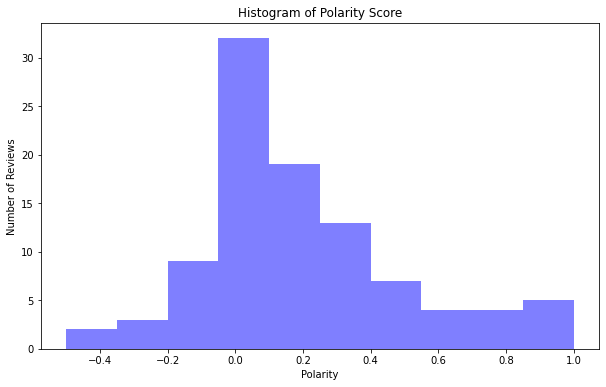

In [7]:
import matplotlib.pyplot as plt
num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show();

In [8]:
mean1 = df['polarity'].mean()
print("Mean of Polarity: ", mean1)
median1 = df['polarity'].median()
print("Median of Polarity: ", median1)

Mean of Polarity:  0.18530324703717369
Median of Polarity:  0.10224581724581724


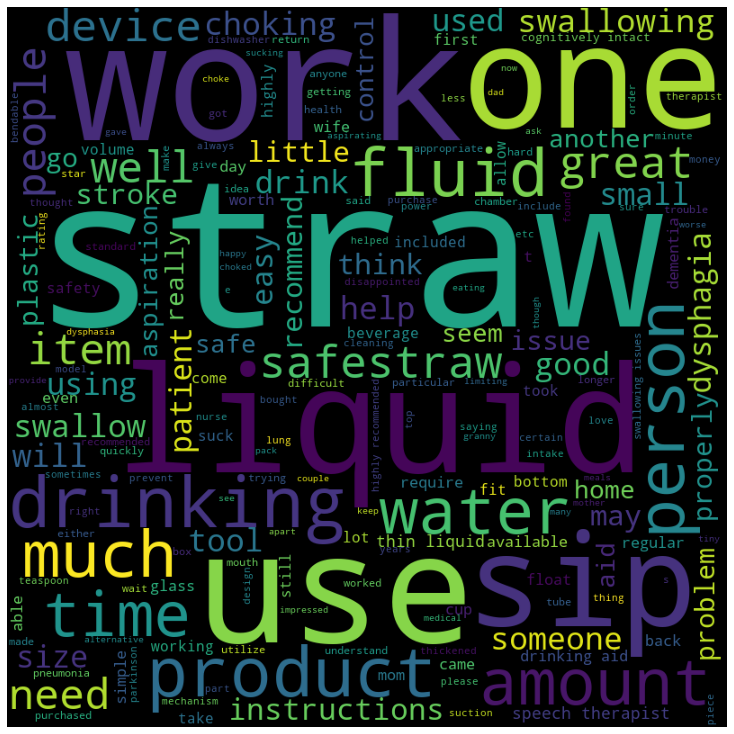

In [9]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)
comment_words = ""
for i in df.review: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

c:\users\jaeme\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

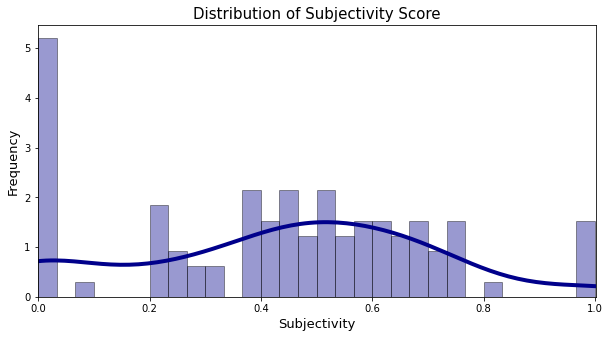

In [10]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)